<a href="https://colab.research.google.com/github/MouadEttali/From-scratch-machine-learning---From-mathematical-formulas-to-functioning-algorithms/blob/main/Multiple_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The purpose of this notebook is to implement Multiple Linear Regression from scratch using python, that is going from first mathematical principles and attempting to reach the same accuracy or predictions as the pre-established machine learning libraries.**

In [1]:
import pandas as pd
import numpy as np

#Loading the data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
#Checking correlation between our variables and the target variables ( total bedrooms)
df.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

**We already notice here a strong positive correlation with 3 variables mainly total_rooms , populaton, households with over 88%**

In [4]:
# Getting rid of the columns with very weak corr and keeping those with strong correlation.
bedrooms = df['total_bedrooms']
df = df.drop(['total_bedrooms','longitude','latitude','housing_median_age','median_income','median_house_value'],axis = 1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


# Exploratory Data analysis

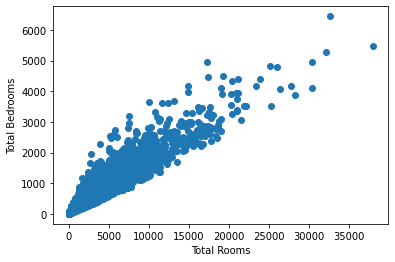

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'],df['bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

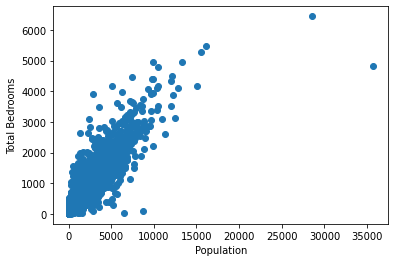

In [6]:
plt.scatter(df['population'],df['bedrooms'])
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()

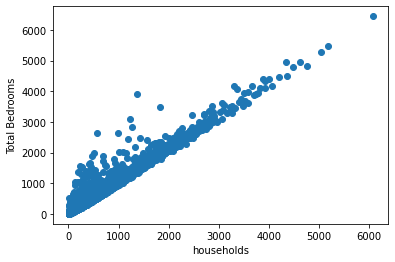

In [7]:
plt.scatter(df['households'],df['bedrooms'])
plt.xlabel('households')
plt.ylabel('Total Bedrooms')
plt.show()

**let's use the scikit learn multiple linear regressor to test against later**

In [9]:
# Peparing training data to feed to model
df_np = df.to_numpy()
df_np.shape

(17000, 4)

In [10]:
X_train , y_train = df_np[:,:3] , df_np[:,-1]
X_train.shape , y_train.shape

((17000, 3), (17000,))

In [11]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions.shape

(17000,)

In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mean_absolute_error(sklearn_y_predictions,y_train),  mean_squared_error(sklearn_y_predictions,y_train)

(39.672217650706656, 5650.631822167879)

In [13]:
predictions_df = pd.DataFrame({'Population': df['population'],
                               'Households': df['households'],
                               'Total Rooms': df['total_rooms'],
                               'Bedrooms': df['bedrooms'],
                               'sklearn bedroom predictions': sklearn_y_predictions
                               })
predictions_df

,Population,Households,Total Rooms,Bedrooms,sklearn bedroom predictions
0,1015.0,472.0,5612.0,1283.0,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562
2,333.0,117.0,720.0,174.0,130.849378
3,515.0,226.0,1501.0,337.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311
...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603


Assuming total_bedrooms[i] = alpha + (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total rooms[i]) + err 

**Generally y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + err**

And so in trying to Minimize our err value we need to find alpha_hat and beta_hats ( 1,2,3) so that :

**Model :   y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])**


In [14]:
def get_predictions(model, X):
  ''' 
  Obtain the predictions for the given model and inputs.

  model : np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs

  Returns: np.array of Floats with shape (n,).
  '''
  (n,p_minus_one) = X.shape
  p = p_minus_one + 1 
  
  new_X = np.ones(shape=(n,p))
  new_X[:,1:] = X

  return np.dot(new_X, model)

In [16]:
#making a dummy model and testing it
test_model = np.array([1,2,3,4])
get_predictions(test_model,X_train).shape

(17000,)

In [17]:
predictions_df['dummy_model'] = get_predictions(test_model,X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,sklearn bedroom predictions,dummy_model
0,1015.0,472.0,5612.0,1283.0,631.829860,16158.0
1,1129.0,463.0,7650.0,1901.0,693.119562,20540.0
2,333.0,117.0,720.0,174.0,130.849378,2908.0
3,515.0,226.0,1501.0,337.0,259.462982,5452.0
4,624.0,262.0,1454.0,326.0,289.315311,5829.0
...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,8632.0
16996,1194.0,465.0,2349.0,528.0,501.086730,10141.0
16997,1244.0,456.0,2677.0,531.0,502.561260,10911.0
16998,1298.0,478.0,2672.0,552.0,522.072603,11151.0


In [18]:
mean_absolute_error(predictions_df['dummy_model'],y_train)

11042.527588235294

**So now we want to minimize our error and get a better model, I'll be using this next function that optimizes the parameters to get us the values we want**

In [19]:
from numpy.linalg import inv

def get_best_model(X,y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Foats with shape (n,p-1) of inputs
  y: np.array of Floats with shape (n) of observed outputs.

  Returns: np.array of shape(p,) representing the model.
  '''
  (n,p_minus_one) = X.shape
  p = p_minus_one + 1 
  
  new_X = np.ones(shape=(n,p))
  new_X[:,1:] = X

  return np.dot(np.dot(inv(np.dot(new_X.T , new_X)),new_X.T),y)

In [20]:
best_model = get_best_model(X_train , y_train)
predictions_df['Best_predictions'] = get_predictions(best_model, X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,sklearn bedroom predictions,dummy_model,Best_predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,16158.0,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562,20540.0,693.119562
2,333.0,117.0,720.0,174.0,130.849378,2908.0,130.849378
3,515.0,226.0,1501.0,337.0,259.462982,5452.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311,5829.0,289.315311
...,...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,8632.0,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730,10141.0,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260,10911.0,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603,11151.0,522.072603


In [23]:
mean_absolute_error(predictions_df['Best_predictions'],y_train)

39.67221765070642